# Exercise 3: Unconstrained Optimization II - Rosenbrock Function

## Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

## Constants

In [27]:
# Rosenbrock function parameters
a = 1
b = 100

## Functions

In [28]:
def rosenbrock(x):
    """Rosenbrock function: f(x,y) = (a-x)^2 + b(y-x^2)^2"""
    # Handle both list and array inputs uniformly
    if isinstance(x, list):
        x = np.array(x)
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2


def grad_rosenbrock(x):
    """Gradient of Rosenbrock function"""
    dx = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0] ** 2)
    dy = 2 * b * (x[1] - x[0] ** 2)
    return np.array([dx, dy])


def hessian_rosenbrock(x):
    """Hessian of Rosenbrock function"""
    h11 = 2 + 8 * b * x[0] ** 2 - 4 * b * (x[1] - x[0] ** 2)
    h12 = -4 * b * x[0]
    h21 = -4 * b * x[0]
    h22 = 2 * b
    return np.array([[h11, h12], [h21, h22]])


def armijo_line_search(x_k, grad_k, f_func, grad_func):
    """Armijo's method for step length selection"""
    t = 1.0
    grad_norm_sq = grad_k @ grad_k

    def w(t_val):
        return x_k - t_val * grad_k

    f_xk = f_func(x_k)

    # Check initial condition
    if f_func(w(t)) <= f_xk - 0.2 * t * grad_norm_sq:
        # Need to increase t
        while f_func(w(t)) <= f_xk - 0.2 * t * grad_norm_sq:
            t_prev = t
            t = 2 * t
            if t > 1e6:
                return t_prev
        return t_prev
    else:
        # Need to decrease t
        while f_func(w(t)) > f_xk - 0.2 * t * grad_norm_sq:
            t = t / 2
            if t < 1e-10:
                return t
        return t


def trajectory_length(points):
    """Calculate the length of a trajectory"""
    length = 0.0
    for i in range(len(points) - 1):
        length += np.linalg.norm(points[i + 1] - points[i])
    return length

## Steepest Descent

In [29]:
def steepest_descent_rosenbrock(x0, tol=1e-4, max_iter=100000):
    """Steepest descent for Rosenbrock"""
    x_k = x0.copy()
    iterations = 0
    points = [x_k.copy()]

    while True:
        grad_k = grad_rosenbrock(x_k)
        grad_norm = np.linalg.norm(grad_k)

        if grad_norm < tol:
            break

        if iterations >= max_iter:
            print(f"Warning: Maximum iterations ({max_iter}) reached")
            break

        t_k = armijo_line_search(x_k, grad_k, rosenbrock, grad_rosenbrock)
        x_k = x_k - t_k * grad_k
        points.append(x_k.copy())
        iterations += 1

    return x_k, iterations, points

# Newton's Method

In [30]:
def newtons_method_rosenbrock(x0, tol=1e-4, max_iter=10000):
    """Newton's method for Rosenbrock"""
    x_k = x0.copy()
    iterations = 0
    points = [x_k.copy()]

    while True:
        grad_k = grad_rosenbrock(x_k)
        grad_norm = np.linalg.norm(grad_k)

        if grad_norm < tol:
            break

        if iterations >= max_iter:
            print(f"Warning: Maximum iterations ({max_iter}) reached")
            break

        H = hessian_rosenbrock(x_k)

        # Check if Hessian is positive definite
        try:
            d = np.linalg.solve(H, -grad_k)
        except Exception:
            # If not positive definite, use steepest descent direction
            d = -grad_k
            d = d / np.linalg.norm(d)

        # Line search in Newton direction
        alpha = 1.0
        while rosenbrock(x_k + alpha * d) > rosenbrock(x_k) + 0.1 * alpha * (
            grad_k @ d
        ):
            alpha *= 0.5
            if alpha < 1e-10:
                break

        x_k = x_k + alpha * d  # alpha or 1 depending on version of newtons
        points.append(x_k.copy())
        iterations += 1

    return x_k, iterations, points

## Main

Task 1: Generating Contour Plots:
Saved: img/rosenbrock_contour.png
Saved: img/rosenbrock_log.png
Task 2: Steepest Descent Method:
	Starting point: (-1.000000, 1.500000)
	Final point: (0.999891, 0.999781)
	Number of iterations: 2664
	Final function value: 1.192259e-08
	Final gradient norm: 9.788361e-05
	Trajectory length: 3.662594
Saved: img/rosenbrock_steepest_descent.png
Task 3: Newton's Method:
	Starting point: (-1.000000, 1.500000)
	Final point: (1.000000, 1.000000)
	Number of iterations: 20
	Final function value: 1.874086e-20
	Final gradient norm: 1.359032e-09
	Trajectory length: 3.559684
Saved: img/rosenbrock_newton.png
Task 4: Scipy Minimize
Optimization result:
	Success: True
	Message: Optimization terminated successfully.
	Final point: (1.000000, 1.000000)
	Final function value: 1.079655e-17
	Number of iterations: 35
	Final gradient norm: 6.748248e-08
SUMMARY:
Steepest Descent:
	Iterations: 2664
	Trajectory length: 3.662594
Newton's Method:
	Iterations: 20
	Trajectory length: 

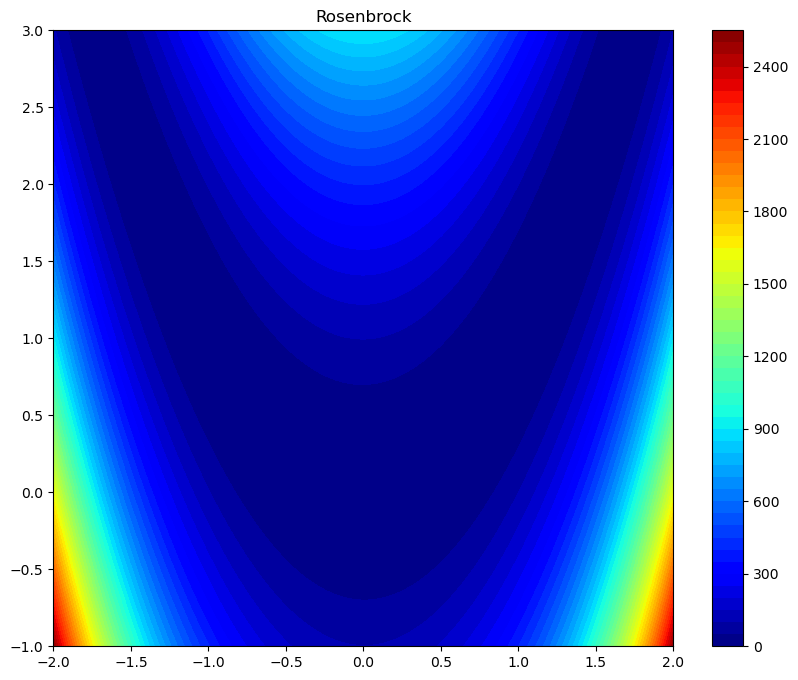

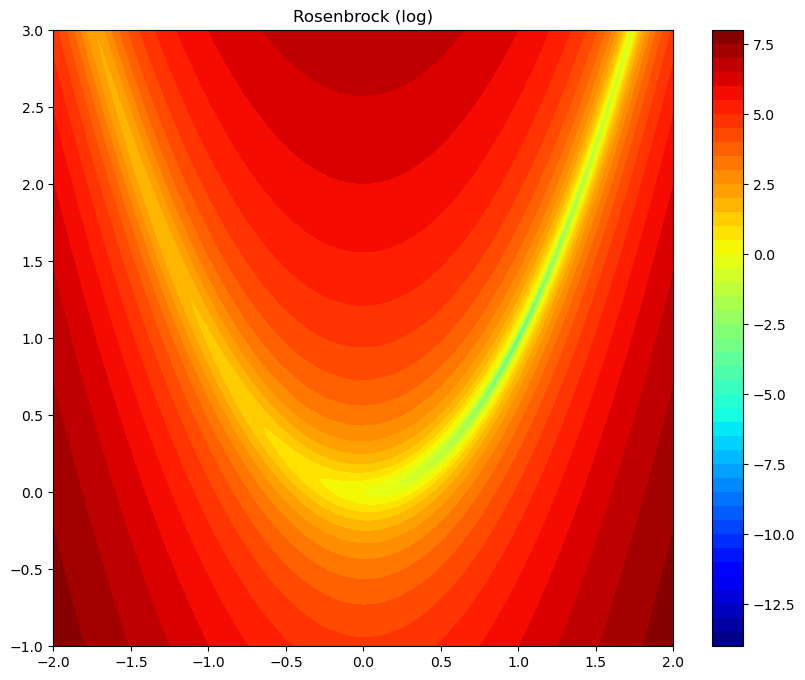

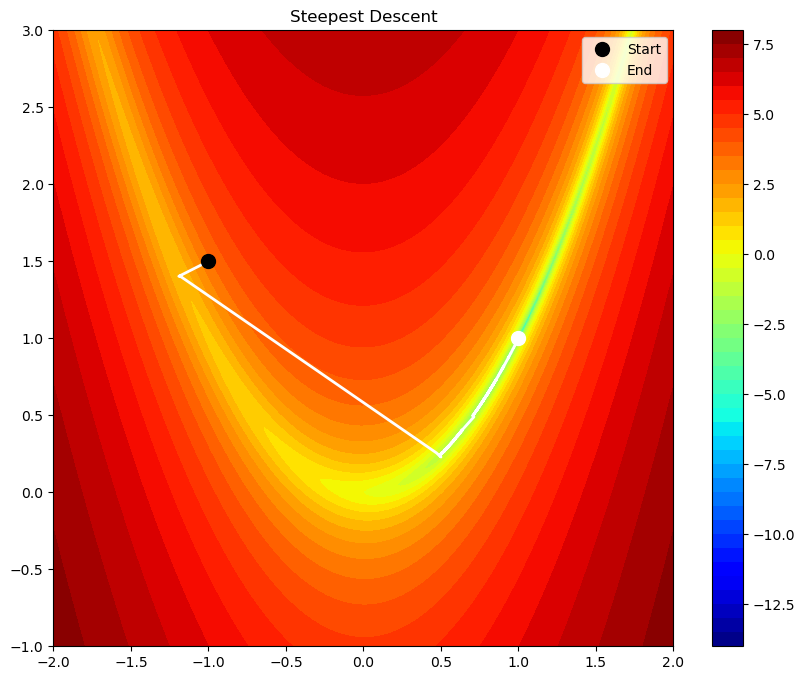

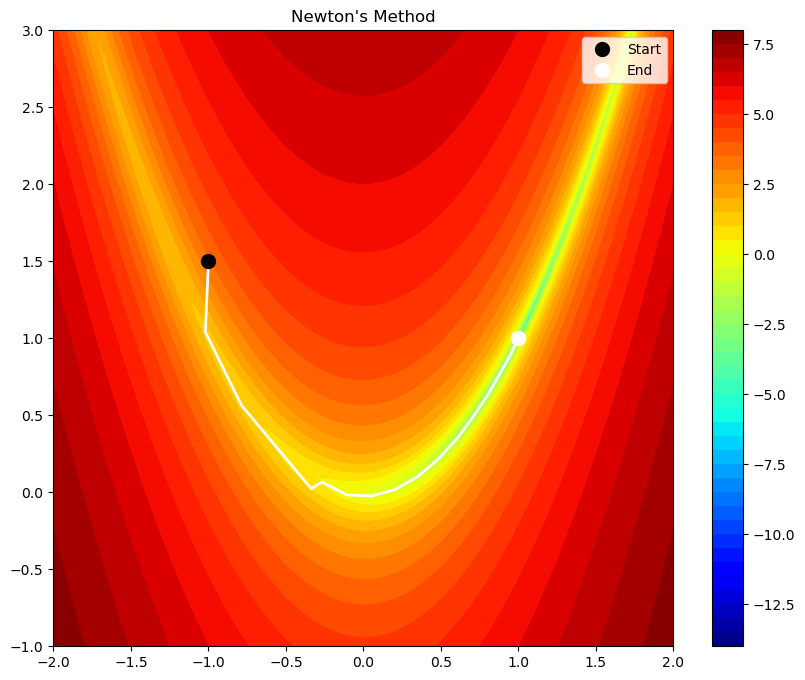

In [31]:
# Task 1: Generate contour plots
print("Task 1: Generating Contour Plots:")

x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 3, 1000)
[X, Y] = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

plt.figure(1, figsize=(10, 8))
plt.contourf(X, Y, Z, 50, cmap=cm.jet)
plt.title("Rosenbrock")
plt.colorbar()
plt.savefig("img/rosenbrock_contour.png", dpi=150, bbox_inches="tight")
print("Saved: img/rosenbrock_contour.png")

plt.figure(2, figsize=(10, 8))
plt.contourf(X, Y, np.log(Z), 50, cmap=cm.jet)
plt.title("Rosenbrock (log)")
plt.colorbar()
plt.savefig("img/rosenbrock_log.png", dpi=150, bbox_inches="tight")
print("Saved: img/rosenbrock_log.png")

# Task 2: Steepest Descent
print("Task 2: Steepest Descent Method:")

x0 = np.array([-1.0, 1.5])
x_sd, iter_sd, points_sd = steepest_descent_rosenbrock(x0, tol=1e-4)

print(f"\tStarting point: ({x0[0]:.6f}, {x0[1]:.6f})")
print(f"\tFinal point: ({x_sd[0]:.6f}, {x_sd[1]:.6f})")
print(f"\tNumber of iterations: {iter_sd}")
print(f"\tFinal function value: {rosenbrock(x_sd):.6e}")
print(f"\tFinal gradient norm: {np.linalg.norm(grad_rosenbrock(x_sd)):.6e}")

traj_length_sd = trajectory_length(points_sd)
print(f"\tTrajectory length: {traj_length_sd:.6f}")

# Plot trajectory
plt.figure(3, figsize=(10, 8))
plt.contourf(X, Y, np.log(Z), 50, cmap=cm.jet)
plt.title("Steepest Descent")
plt.colorbar()

px = np.array([p[0] for p in points_sd])
py = np.array([p[1] for p in points_sd])
plt.plot(px, py, "w-", linewidth=2)
plt.plot(px[0], py[0], "o", color="black", markersize=10, label="Start")
plt.plot(px[-1], py[-1], "o", color="white", markersize=10, label="End")
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.legend()
plt.savefig("img/rosenbrock_steepest_descent.png", dpi=150, bbox_inches="tight")
print("Saved: img/rosenbrock_steepest_descent.png")

# Task 3: Newton's Method
print("Task 3: Newton's Method:")

x_nm, iter_nm, points_nm = newtons_method_rosenbrock(x0, tol=1e-4)

print(f"\tStarting point: ({x0[0]:.6f}, {x0[1]:.6f})")
print(f"\tFinal point: ({x_nm[0]:.6f}, {x_nm[1]:.6f})")
print(f"\tNumber of iterations: {iter_nm}")
print(f"\tFinal function value: {rosenbrock(x_nm):.6e}")
print(f"\tFinal gradient norm: {np.linalg.norm(grad_rosenbrock(x_nm)):.6e}")

traj_length_nm = trajectory_length(points_nm)
print(f"\tTrajectory length: {traj_length_nm:.6f}")

# Plot trajectory
plt.figure(4, figsize=(10, 8))
plt.contourf(X, Y, np.log(Z), 50, cmap=cm.jet)
plt.title("Newton's Method")
plt.colorbar()

px = np.array([p[0] for p in points_nm])
py = np.array([p[1] for p in points_nm])
plt.plot(px, py, "w-", linewidth=2)
plt.plot(px[0], py[0], "o", color="black", markersize=10, label="Start")
plt.plot(px[-1], py[-1], "o", color="white", markersize=10, label="End")
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.legend()
plt.savefig("img/rosenbrock_newton.png", dpi=150, bbox_inches="tight")
print("Saved: img/rosenbrock_newton.png")

# Task 4: Scipy optimization
print("Task 4: Scipy Minimize")

res = minimize(rosenbrock, x0, jac=grad_rosenbrock, method="BFGS")

print("Optimization result:")
print(f"\tSuccess: {res.success}")
print(f"\tMessage: {res.message}")
print(f"\tFinal point: ({res.x[0]:.6f}, {res.x[1]:.6f})")
print(f"\tFinal function value: {res.fun:.6e}")
print(f"\tNumber of iterations: {res.nit}")
print(f"\tFinal gradient norm: {np.linalg.norm(res.jac):.6e}")

# Summary
print("SUMMARY:")
print("Steepest Descent:")
print(f"\tIterations: {iter_sd}")
print(f"\tTrajectory length: {traj_length_sd:.6f}")
print("Newton's Method:")
print(f"\tIterations: {iter_nm}")
print(f"\tTrajectory length: {traj_length_nm:.6f}")
print("Scipy BFGS:")
print(f"\tIterations: {res.nit}")

print("\nAll plots saved to img/ directory")